**Group Members**

1. Chananchida Rattanaumpol 6310422005

2. Sirilak Jittrisin 6310422012

3. Pettcharapan Chenyawanich 6310422019

# **Load Dependencies**

In [ ]:
!pip install pycaret

In [ ]:
import pandas as pd
import numpy as np
from pycaret.clustering import *

# **Load Data**

In [ ]:
df = pd.read_csv('Supermarket Data.csv')

In [ ]:
df['SHOP_DATE'] = df['SHOP_DATE'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))

In [ ]:
df.loc[(df['SHOP_WEEKDAY'] == 1) | (df['SHOP_WEEKDAY'] == 7), 'WEEKEND'] = 1 
df.loc[(df['SHOP_WEEKDAY'] != 1) & (df['SHOP_WEEKDAY'] != 7), 'WEEKEND'] = 0

df.loc[(df['SHOP_HOUR'] >0) & (df['SHOP_HOUR'] <=12), 'MORNING'] = 1 
df.loc[(df['SHOP_HOUR'] <=0) | (df['SHOP_HOUR'] > 12), 'MORNING'] = 0

df.loc[(df['SHOP_HOUR'] >12) & (df['SHOP_HOUR'] <=18), 'AFTERNOON'] = 1 
df.loc[(df['SHOP_HOUR'] <=12) | (df['SHOP_HOUR'] > 18), 'AFTERNOON'] = 0

df.loc[(df['SHOP_HOUR'] > 18) & (df['SHOP_HOUR'] <=24), 'EVENING'] = 1 
df.loc[(df['SHOP_HOUR'] <= 18) | (df['SHOP_HOUR'] > 24), 'EVENING'] = 0

df['CNT'] = 1
df.tail(5)

,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,PROD_CODE_40,CUST_CODE,CUST_PRICE_SENSITIVITY,CUST_LIFESTAGE,BASKET_ID,BASKET_SIZE,BASKET_PRICE_SENSITIVITY,BASKET_TYPE,BASKET_DOMINANT_MISSION,STORE_CODE,STORE_FORMAT,STORE_REGION,WEEKEND,MORNING,AFTERNOON,EVENING,CNT
956569,200617,2006-06-22,5,12,3,3.96,PRD0904997,CL00074,DEP00021,G00007,D00002,NaN,NaN,NaN,994101100088778,M,MM,Top Up,Fresh,STORE00002,LS,W01,0.0,1.0,0.0,0.0,1
956570,200633,2006-10-13,6,20,3,3.96,PRD0904997,CL00074,DEP00021,G00007,D00002,NaN,NaN,NaN,994102700099738,L,LA,Top Up,Fresh,STORE00002,LS,W01,0.0,0.0,0.0,1.0,1
956571,200617,2006-06-22,5,18,3,3.96,PRD0904997,CL00074,DEP00021,G00007,D00002,CUST0000544241,LA,YA,994101100506174,L,LA,Top Up,Fresh,STORE00002,LS,W01,0.0,0.0,1.0,0.0,1
956572,200619,2006-07-06,5,19,3,3.96,PRD0904997,CL00074,DEP00021,G00007,D00002,CUST0000423155,LA,YF,994101300433650,L,LA,Full Shop,Fresh,STORE00002,LS,W01,0.0,0.0,0.0,1.0,1
956573,200635,2006-10-23,2,21,3,3.96,PRD0904997,CL00074,DEP00021,G00007,D00002,NaN,NaN,NaN,994102900104676,L,MM,Top Up,Fresh,STORE00002,LS,W01,0.0,0.0,0.0,1.0,1


In [ ]:
dummy_basket = pd.get_dummies(df['BASKET_SIZE'])
dummy_basket = dummy_basket.rename({'S': 'BASKET_S', 'M': 'BASKET_M', 'L': 'BASKET_L'}, axis=1)
dummy_store = pd.get_dummies(df['STORE_REGION'])
dummy_store = dummy_store.rename({'E02': 'STORE_E02', 'W01': 'STORE_W01'}, axis=1)
dummy_category = pd.get_dummies(df['BASKET_DOMINANT_MISSION'])
df = pd.concat([df,dummy_store,dummy_basket,dummy_category], axis=1)
df.tail()

,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,PROD_CODE_40,CUST_CODE,CUST_PRICE_SENSITIVITY,CUST_LIFESTAGE,BASKET_ID,BASKET_SIZE,BASKET_PRICE_SENSITIVITY,BASKET_TYPE,BASKET_DOMINANT_MISSION,STORE_CODE,STORE_FORMAT,STORE_REGION,WEEKEND,MORNING,AFTERNOON,EVENING,CNT,STORE_E02,STORE_W01,BASKET_L,BASKET_M,BASKET_S,Fresh,Grocery,Mixed,Nonfood,XX
956569,200617,2006-06-22,5,12,3,3.96,PRD0904997,CL00074,DEP00021,G00007,D00002,NaN,NaN,NaN,994101100088778,M,MM,Top Up,Fresh,STORE00002,LS,W01,0.0,1.0,0.0,0.0,1,0,1,0,1,0,1,0,0,0,0
956570,200633,2006-10-13,6,20,3,3.96,PRD0904997,CL00074,DEP00021,G00007,D00002,NaN,NaN,NaN,994102700099738,L,LA,Top Up,Fresh,STORE00002,LS,W01,0.0,0.0,0.0,1.0,1,0,1,1,0,0,1,0,0,0,0
956571,200617,2006-06-22,5,18,3,3.96,PRD0904997,CL00074,DEP00021,G00007,D00002,CUST0000544241,LA,YA,994101100506174,L,LA,Top Up,Fresh,STORE00002,LS,W01,0.0,0.0,1.0,0.0,1,0,1,1,0,0,1,0,0,0,0
956572,200619,2006-07-06,5,19,3,3.96,PRD0904997,CL00074,DEP00021,G00007,D00002,CUST0000423155,LA,YF,994101300433650,L,LA,Full Shop,Fresh,STORE00002,LS,W01,0.0,0.0,0.0,1.0,1,0,1,1,0,0,1,0,0,0,0
956573,200635,2006-10-23,2,21,3,3.96,PRD0904997,CL00074,DEP00021,G00007,D00002,NaN,NaN,NaN,994102900104676,L,MM,Top Up,Fresh,STORE00002,LS,W01,0.0,0.0,0.0,1.0,1,0,1,1,0,0,1,0,0,0,0


# **Prepare customer single view**

# Define features

Total visits = COUNT(DISTINCT BASKET ID)

Ticket size = SUM(SPEND)/COUNT(DISTINCT BASKET ID)

Total no. of SKUs


# Calculate features

In [ ]:
##prepare customer single view
df_csv = df[df['CUST_CODE'].notnull()].groupby(by=['CUST_CODE']).agg(TotalSpend=('SPEND', 'sum'),
                                                                                  TotalVisits=('BASKET_ID', 'nunique'),
                                                                                  TotalSKUs=('PROD_CODE', 'nunique'),
                                                                                  FirstDate=('SHOP_DATE', 'min'),
                                                                                  LastDate=('SHOP_DATE', 'max'),
                                                                                  Total_txn=('CNT', 'sum'),
                                                                                  Total_BASKET_S	=('BASKET_S', 'sum'),
                                                                                  Total_BASKET_M=('BASKET_M', 'sum'),
                                                                                  Total_BASKET_L=('BASKET_L', 'sum'),
                                                                                  Total_WEEKEND=('WEEKEND', 'sum'),
                                                                                  Total_MORNING=('MORNING', 'sum'),
                                                                                  Total_AFTERNOON=('AFTERNOON', 'sum'),
                                                                                  Total_EVENING=('EVENING', 'sum'),
                                                                                  Total_STORE_E02=('STORE_E02', 'sum'),
                                                                                  Total_STORE_W01=('STORE_W01', 'sum'),
                                                                                  Total_Fresh=('Fresh', 'sum'),
                                                                                  Total_Grocery=('Grocery', 'sum'),
                                                                                  Total_Mixed=('Mixed', 'sum'),
                                                                                  Total_Nonfood=('Nonfood', 'sum')
                                                                                  ).reset_index()

In [ ]:
##calculate ticket size
df_csv['TicketSize'] = df_csv['TotalSpend']/df_csv['TotalVisits']

##find max date in the dataset
max_date = df_csv['LastDate'].max()

##calculate total days of the relationship
df_csv['total_days'] = (df_csv['LastDate'] - df_csv['FirstDate']).dt.days + 1

##calculate recency days
df_csv['recency'] = (max_date - df_csv['LastDate']).dt.days

##Proportion txn
df_csv['percent_basket_s'] = df_csv['Total_BASKET_S']*100/df_csv['Total_txn']
df_csv['percent_basket_m'] = df_csv['Total_BASKET_M']*100/df_csv['Total_txn']
df_csv['percent_basket_l'] = df_csv['Total_BASKET_L']*100/df_csv['Total_txn']
df_csv['percent_weekend'] = df_csv['Total_WEEKEND']*100/df_csv['Total_txn']
df_csv['percent_morning'] = df_csv['Total_MORNING']*100/df_csv['Total_txn']
df_csv['percent_afternoon'] = df_csv['Total_AFTERNOON']*100/df_csv['Total_txn']
df_csv['percent_evening'] = df_csv['Total_EVENING']*100/df_csv['Total_txn']
df_csv['percent_e02'] = df_csv['Total_STORE_E02']*100/df_csv['Total_txn']
df_csv['percent_w01'] = df_csv['Total_STORE_W01']*100/df_csv['Total_txn']
df_csv['percent_fresh'] = df_csv['Total_Fresh']*100/df_csv['Total_txn']
df_csv['percent_grocery'] = df_csv['Total_Grocery']*100/df_csv['Total_txn']
df_csv['percent_mixed'] = df_csv['Total_Mixed']*100/df_csv['Total_txn']
df_csv['percent_nonfood'] = df_csv['Total_Nonfood']*100/df_csv['Total_txn']

df_csv.head(5)

,CUST_CODE,TotalSpend,TotalVisits,TotalSKUs,FirstDate,LastDate,Total_txn,Total_BASKET_S,Total_BASKET_M,Total_BASKET_L,Total_WEEKEND,Total_MORNING,Total_AFTERNOON,Total_EVENING,Total_STORE_E02,Total_STORE_W01,Total_Fresh,Total_Grocery,Total_Mixed,Total_Nonfood,TicketSize,total_days,recency,percent_basket_s,percent_basket_m,percent_basket_l,percent_weekend,percent_morning,percent_afternoon,percent_evening,percent_e02,percent_w01,percent_fresh,percent_grocery,percent_mixed,percent_nonfood
0,CUST0000000181,2.44,1,1,2007-01-06,2007-01-06,1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0,2.440000,1,547,100.000000,0.000000,0.000000,100.000000,0.000000,100.000000,0.000000,100.0,0.0,100.000000,0.000000,0.000000,0.000000
1,CUST0000000369,959.33,220,189,2006-04-16,2008-07-05,699,117.0,499.0,83.0,176.0,91.0,560.0,48.0,0.0,699.0,479.0,87.0,127.0,6,4.360591,812,1,16.738197,71.387697,11.874106,25.178827,13.018598,80.114449,6.866953,0.0,100.0,68.526466,12.446352,18.168813,0.125894
2,CUST0000000689,328.57,16,116,2007-07-22,2008-06-23,185,4.0,17.0,164.0,31.0,78.0,4.0,103.0,185.0,0.0,34.0,16.0,132.0,3,20.535625,338,13,2.162162,9.189189,88.648649,16.756757,42.162162,2.162162,55.675676,100.0,0.0,18.378378,8.648649,71.351351,0.237838
3,CUST0000000998,5.95,3,4,2006-05-04,2006-07-07,4,3.0,1.0,0.0,2.0,2.0,2.0,0.0,4.0,0.0,0.0,2.0,0.0,2,1.983333,65,730,75.000000,25.000000,0.000000,50.000000,50.000000,50.000000,0.000000,100.0,0.0,0.000000,50.000000,0.000000,50.000000
4,CUST0000001163,39.74,4,24,2006-10-22,2008-06-22,25,2.0,0.0,23.0,24.0,0.0,25.0,0.0,25.0,0.0,13.0,0.0,12.0,0,9.935000,610,14,8.000000,0.000000,92.000000,96.000000,0.000000,100.000000,0.000000,100.0,0.0,52.000000,0.000000,48.000000,0.000000


In [ ]:
#drop columns
df_csv_final = df_csv.drop(['CUST_CODE','FirstDate', 'LastDate','Total_BASKET_S','Total_BASKET_M','Total_BASKET_L','Total_WEEKEND','Total_MORNING','Total_AFTERNOON','Total_EVENING','Total_STORE_E02','Total_STORE_W01','Total_Fresh','Total_Grocery','Total_Mixed','Total_Nonfood'], axis = 1)
df_csv_final.tail()

,TotalSpend,TotalVisits,TotalSKUs,Total_txn,TicketSize,total_days,recency,percent_basket_s,percent_basket_m,percent_basket_l,percent_weekend,percent_morning,percent_afternoon,percent_evening,percent_e02,percent_w01,percent_fresh,percent_grocery,percent_mixed,percent_nonfood
6095,453.58,30,206,297,15.119333,698,95,1.683502,10.437710,87.878788,32.323232,14.141414,83.164983,2.693603,100.0,0.0,59.595960,4.377104,35.016835,0.148148
6096,105.11,11,46,60,9.555455,740,59,5.000000,28.333333,66.666667,63.333333,0.000000,56.666667,43.333333,0.0,100.0,6.666667,33.333333,55.000000,0.733333
6097,5.86,1,4,4,5.860000,1,742,0.000000,100.000000,0.000000,100.000000,0.000000,100.000000,0.000000,0.0,100.0,100.000000,0.000000,0.000000,0.000000
6098,444.17,21,127,236,21.150952,555,31,2.118644,4.237288,93.644068,25.423729,24.152542,75.423729,0.423729,100.0,0.0,52.542373,2.966102,43.644068,0.423729
6099,17.67,6,13,15,2.945000,624,80,20.000000,80.000000,0.000000,6.666667,60.000000,40.000000,0.000000,100.0,0.0,33.333333,26.666667,40.000000,0.000000


# **Cluster customers**

In [ ]:
exp_clu = setup(data=df_csv_final, normalize=True)

,Description,Value
0,session_id,4739
1,Original Data,"(6100, 20)"
2,Missing Values,False
3,Numeric Features,20
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(6100, 20)"
9,CPU Jobs,-1


In [ ]:
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch
kmodes,K-Modes Clustering,kmodes.kmodes.KModes


In [ ]:
get_metrics()

,Name,Display Name,Score Function,Scorer,Target,Args,Greater is Better,Needs Ground Truth,Custom
ID,,,,,,,,,
silhouette,Silhouette,Silhouette,<function silhouette_score at 0x7f58e9870cb0>,make_scorer(silhouette_score),pred,{},True,False,False
chs,Calinski-Harabasz,Calinski-Harabasz,<function calinski_harabasz_score at 0x7f58e98...,make_scorer(calinski_harabasz_score),pred,{},True,False,False
db,Davies-Bouldin,Davies-Bouldin,<function davies_bouldin_score at 0x7f58e9877050>,make_scorer(davies_bouldin_score),pred,{},True,False,False
hs,Homogeneity Score,Homogeneity,<function homogeneity_score at 0x7f58e9851d40>,make_scorer(homogeneity_score),pred,{},True,True,False
ari,Rand Index,Rand Index,<function adjusted_rand_score at 0x7f58e9851b00>,make_scorer(adjusted_rand_score),pred,{},True,True,False
cs,Completeness Score,Completeness,<function completeness_score at 0x7f58e9851dd0>,make_scorer(completeness_score),pred,{},True,True,False


# Compare model performance

In [ ]:
metrics = []
for model in models().index:
    if model in ['meanshift', 'optics']:
        continue
    create_model(model)
    metric_result = pull()
    metric_result['model'] = model
    metrics.append(metric_result)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0243,223.3768,3.2014,0,0,0


In [ ]:
cluster_metrics = pd.concat(metrics)
cluster_metrics.set_index("model", inplace=True)
cluster_metrics.sort_values(by='Silhouette', ascending=False, inplace=True)
cluster_metrics.style.highlight_max(subset=['Silhouette', 'Calinski-Harabasz'], color = 'green', axis = 0).highlight_min(subset=['Davies-Bouldin'], color = 'green', axis = 0)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
model,,,,,,
sc,0.503700,17.850000,0.579800,0,0,0
kmeans,0.149300,1017.579600,1.972700,0,0,0
hclust,0.140200,827.032400,1.733800,0,0,0
birch,0.102700,806.573900,2.135900,0,0,0
kmodes,0.024300,223.376800,3.201400,0,0,0
ap,0.000000,0.000000,0.000000,0,0,0
dbscan,-0.135700,27.851200,0.914800,0,0,0


# Spectral Clustering Clustering

In [ ]:
sc = create_model('sc')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5037,17.85,0.5798,0,0,0


In [ ]:
plot_model(sc)

# KMeans Clustering

In [ ]:
kmeans = create_model('kmeans', num_clusters = 4)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1493,1017.5796,1.9727,0,0,0


In [ ]:
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=4739, tol=0.0001, verbose=0)


In [ ]:
plot_model(kmeans)

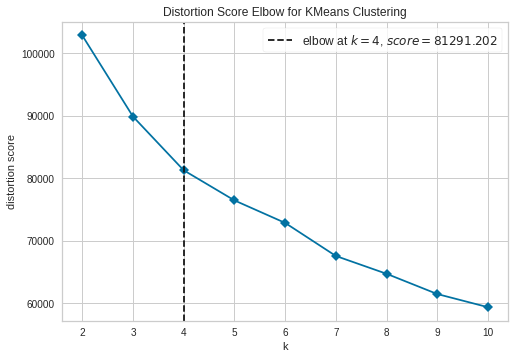

In [ ]:
plot_model(kmeans, plot = 'elbow')

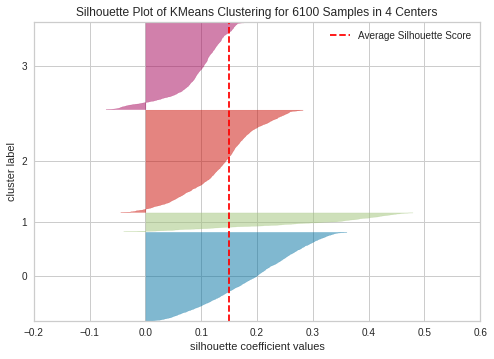

In [ ]:
plot_model(kmeans, plot = 'silhouette')

## https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

# **Interpret results and plan for actions**

In [ ]:
df_csv['Cluster'] = kmeans.labels_
df_cluster = df_csv.groupby(by='Cluster').mean()
df_cluster

,TotalSpend,TotalVisits,TotalSKUs,Total_txn,Total_BASKET_S,Total_BASKET_M,Total_BASKET_L,Total_WEEKEND,Total_MORNING,Total_AFTERNOON,Total_EVENING,Total_STORE_E02,Total_STORE_W01,Total_Fresh,Total_Grocery,Total_Mixed,Total_Nonfood,TicketSize,total_days,recency,percent_basket_s,percent_basket_m,percent_basket_l,percent_weekend,percent_morning,percent_afternoon,percent_evening,percent_e02,percent_w01,percent_fresh,percent_grocery,percent_mixed,percent_nonfood
Cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,221.593253,13.809890,63.270879,113.221429,3.745055,18.552198,90.924176,31.472527,27.603846,61.478571,24.139011,91.001099,22.220330,50.063187,11.043956,50.493407,1.490110,21.355753,409.794505,191.592308,3.723164,13.363312,82.913524,27.569736,21.138442,57.435743,21.425815,81.479758,18.520242,44.802470,10.612963,42.972923,0.592929
1,2431.883436,168.856410,358.807692,1308.892308,53.494872,257.882051,997.515385,374.189744,385.948718,685.161538,237.782051,770.935897,537.956410,657.720513,112.523077,524.264103,12.643590,17.980956,793.279487,5.589744,4.952969,21.613991,73.433041,28.835631,28.386121,52.760541,18.853338,58.716186,41.283814,50.669241,9.226760,38.807683,0.099047
2,66.760204,12.644656,20.626603,38.263658,7.116390,23.571021,7.576247,10.855582,12.625653,19.603800,6.034204,11.231829,27.031829,21.272684,6.832779,8.643705,1.313064,5.864045,330.595249,242.205226,13.874072,78.193692,7.932237,29.474056,30.089279,52.785329,17.125391,44.023770,55.976230,50.385679,25.637860,18.365974,2.152134
3,4.800672,2.561905,2.257703,3.258263,2.917087,0.249860,0.091317,0.936134,1.182073,1.529412,0.546779,1.436415,1.821849,1.160224,1.349580,0.277871,0.393277,1.920847,152.241457,348.463305,95.552179,3.222409,1.225411,29.150383,33.447454,48.681657,17.870889,44.603175,55.396825,37.126163,40.043889,6.698915,12.169133


In [ ]:
from google.colab import drive
drive.mount('drive')
df_cluster.to_csv('/content/drive/My Drive/customer_segment.csv', encoding='utf-8', index=False)

Mounted at drive


**Statistic Summary (mean)**

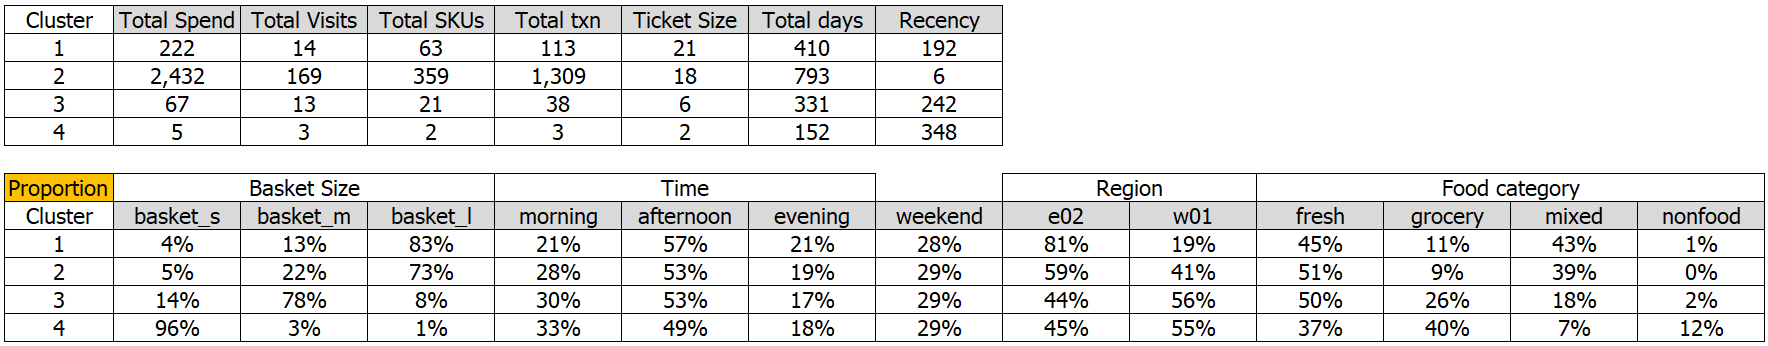

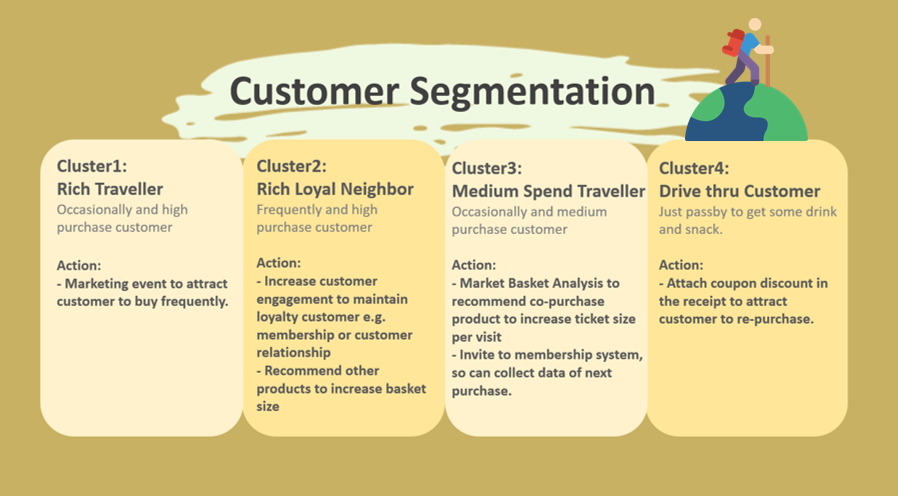